In [2]:
import pandas as pd 
import s3fs
import sys
sys.path.append('../')

In [3]:
import spark_processing_scripts.util_general as ug
fs = s3fs.S3FileSystem(client_kwargs={'endpoint_url': 'http://s3.dev.obdc.bcs.bloomberg.com'})

In [13]:
ls_df = pd.DataFrame(fs.ls('s3://aspangher/edit-pathways/spark_processing_scripts-output/nyt', '-lh'))

In [23]:
ls_df.loc[lambda df: df['size'] > 100].shape 

(37, 9)

# Files of Small Size

In [16]:
ls_df.loc[lambda df: df['size'] == 100].iloc[0]

Key             aspangher/edit-pathways/spark_processing_scrip...
LastModified                     2021-05-02 05:24:42.105000+00:00
ETag                           "b856495c933bf15a8269d2adb9d1b58c"
Size                                                          100
StorageClass                                             STANDARD
Owner           {'DisplayName': 'ktsereteli1-nlpie', 'ID': 'kt...
type                                                         file
size                                                          100
name            aspangher/edit-pathways/spark_processing_scrip...
Name: 0, dtype: object

In [26]:
f_path = 's3://' + ls_df.loc[lambda df: df['size'] == 100].iloc[0]['Key']

In [27]:
with fs.open('s3://' + f_path) as f:
    df = pd.read_csv(f, index_col=0)

In [28]:
df

,entry_id,version_x,version_y,sent_idx_x,sent_idx_y,avg_sentence_distance_x,avg_sentence_distance_y


# All files

In [40]:
all_prefetched_data = ug.download_prefetched_data('nyt', show_progress=True)

  0%|          | 0/784 [00:00<?, ?it/s]

In [42]:
all_prefetched_data.to_pickle('2021-05-03__nyt-spark-matched-data-cache.pkl')

In [43]:
all_prefetched_data['entry_id'].unique().shape

(16999,)

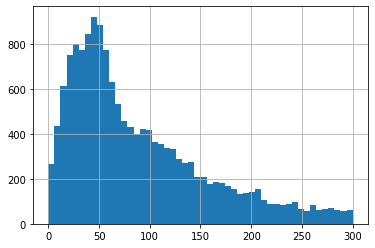

In [60]:
all_prefetched_data['entry_id'].value_counts().hist(bins=50, range=(0, 300))

In [47]:
all_prefetched_data.loc[lambda df: df['entry_id'] == 869986]

,entry_id,version_x,version_y,sent_idx_x,sent_idx_y,avg_sentence_distance_x,avg_sentence_distance_y
19082,869986,0,1,1.0,1.0,0.0,0.0
43576,869986,0,1,0.0,0.0,0.0,0.0


# Check Sentence Data

In [10]:
import sqlite3
import os

In [11]:
con = sqlite3.connect('../data/diffengine-diffs/db/newssniffer-nytimes.db')

In [12]:
res_df = pd.read_sql('select * from entryversion where entry_id = 869986', con=con)

In [13]:
res_df['summary'][0]

'The United Nations Security Council unanimously adopted a statement on Wednesday asking all countries to thwart foreign-born militants who have sought to join the Islamic State, the Nusra Front and other extremist groups whose violent campaigns have convulsed the Middle East. The Security Council statement, which reflected the recommendations of a United Nations panel made public on Monday, said all countries should take steps to block the sale of smuggled oil and antiquities that the Islamic State uses to help finance itself.'

In [14]:
res_df

,index,version,title,created,url,source,entry_id,archive_url,num_versions,summary,joint_key,id
0,32943,0,A Call to Block Recruiting of Militants,2014-11-20 04:25:00+00:00,http://www.nytimes.com/2014/11/20/world/a-call...,nytimes,869986,https://www.newssniffer.co.uk/articles/869986/...,2,The United Nations Security Council unanimousl...,869986-0,869986-0
1,32944,1,U.N. Security Council Calls to Block Recruitin...,2014-11-20 05:40:00+00:00,http://www.nytimes.com/2014/11/20/world/a-call...,nytimes,869986,https://www.newssniffer.co.uk/articles/869986/...,2,The United Nations Security Council unanimousl...,869986-1,869986-1


# Sentences

In [ ]:
pkl_buffer

In [25]:
s3_sent_dir = 's3://aspangher/edit-pathways/tmp/test.pkl'

In [26]:
with fs.open(s3_sent_dir, 'wb') as f:
    res_df.to_pickle(f)

In [ ]:
fs.download(fpath, fname)

In [ ]:
s3_sent_dir = 's3://aspangher/edit-pathways/spark_processing_scripts-output_sentences/nyt'
fname = 'df_nyt__start_0__end_20000__num_1.pkl'

fpath = os.path.join(s3_sent_dir, fname)
with open(fname) as f:
    df = pd.read_pickle(f, compression='gzip')

In [75]:
fs.ls(fpath)

['aspangher/edit-pathways/spark_processing_scripts-output_sentences/nyt/df_nyt__start_0__end_20000__num_1.csv.gz']